## Functional analysis of gene signatures
Biancamaria Florenzi, r0777934

This functional analysis is aimed at exploring the functions, interactions and pathways of those genes that resulted to be significantly differentially expressed between the two conditions. The hypotesis is that Filamin B regulates the transcription of these genes (directly or indirectly is to be assessed), and that these genes are involved in apoptosis, cellular proliferation and chondrocyte development signaling pathways. This is significant, because Filamin B expression has been correlated with cancer proliferation, invasivness and metastasis by previous studies on cancer cells; the hypothesis is therefore that Filamin B regulates proliferation or apoptosis in cancer cells.

Note: apoptosis is the process by which cells are packaged and discarded

In the experiment of the reference literature, phenotypically, the Filamin B knocked down HeLa cells showed reduced apoptosis.

In [2]:
mkdir -p /mnt/storage/$USER/jupyternotebooks/Assignment_1/functional_analysis_gene_signatures/
cd /mnt/storage/$USER/jupyternotebooks/Assignment_1/functional_analysis_gene_signatures/

In [3]:
echo $PWD

/mnt/storage/r0777934/jupyternotebooks/Assignment_1/functional_analysis_gene_signatures


In [4]:
ln -sf /mnt/storage/$USER/jupyternotebooks/Assignment_1/deseq.trimmed.results.tsv . 

In [45]:
head -2 deseq.trimmed.results.tsv | column #I have added Gene in the jupyter editor
 wc -l deseq.trimmed.results.tsv

Gene	baseMean	log2FoldChange	lfcSE	stat	pvalue	padj
FLNB	35315.5469390111	-1.81071536346227	0.207733913704595	-8.71651301981036	2.86900989795679e-18	3.03684697698726e-14
41864 deseq.trimmed.results.tsv


The file contains the names and informations about the differentially expressed genes, in particular the baseMean (the average of the normalized count values, dividing by size factors, taken over all samples), the log change between conditions, the p-value and the adjusted p-value. For some of the genes, the adjusted p-value is set to NA, and this means that the counts were probably too low for the result to be considered significative. Indeed, DESeq2 is quite stringent and filtered out lowly expressed genes.

In [36]:
grep -n NAIP deseq.trimmed.results.tsv

34103:NAIP	73.5972887210597	1.34555223729136	0.999864634754657	1.34573440295898	0.178388187178292	NA


## Up and down regulated genes according to arbitrary thresholds
In this set I am interested in genes that have a logchange with absolute value higher than a certain threshold and a adjusted p-value lower than a certain threshold. Such threshold can be set arbitrarily to reasonable and commonly used values, for isntance 1 for the log2change, which would mean a doubling of the expression between the two conditions, and 0.05 for the adjusted p-value. 

The names of the genes that satisfy these requirements can be writted to file; we obtain one file that contains the names of the upregulated genes according to our arbitrary thresholds (122 genes) and one with the downregulated genes (19 genes).

In [35]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print ;}' deseq.trimmed.results.tsv | grep MALAT1

MALAT1	5308.61699600509	1.48231782330176	0.205982086820316	7.19634336258972	6.18487640525795e-13	3.27334583748277e-09


In [21]:
cat deseq.trimmed.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene | wc -l

21906


In [39]:
awk '$3 != "NA" && $3 > 1 && $7 < 0.05 {print $1}' deseq.trimmed.results.tsv | grep -v baseMean> up-logFC1-p05.txt
awk '$3 != "NA" && $3 < -1 && $7 < 0.05 {print $1}' deseq.trimmed.results.tsv | grep -v baseMean> down-logFC1-p05.txt

In [40]:
wc -l up-logFC1-p05.txt
wc -l down-logFC1-p05.txt

122 up-logFC1-p05.txt
19 down-logFC1-p05.txt


### Humanmine
I can start by loading my list of upregulated genes in Humanmine. The pathway enrichment widged shows that the list of genes that I have provided (note that only 109 out of the 122 have been actually recognised and used by Humanmine) is enriched for these pathways:

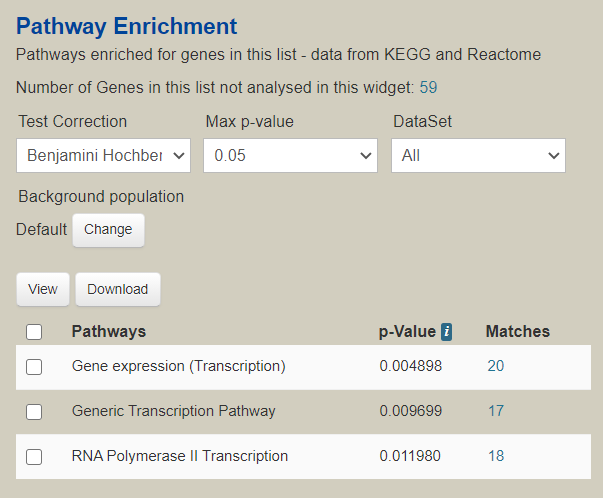

This still does not provide me with very interesting insight, so I continue with other approaches.

### David
I also explore the upregulated genes with the functional annotator tool David. In the resulting functional annotation table for my list there are some that I have already encountered in Humanmine, like the terms transcription and regulation of transcription. There are also other interesting terms that result to be enriched in my list: 
- blood vessel remodelling, 
- BMP (Bone Morphogenetic Proteins) signaling pathway, 
- mitochondrial organisation, 
- regulation of epithelial cell proliferation, 
- extracellular matrix organization and so on. 

These terms can help me have an idea of what these subset of genes are involved in and related to. I see that the starting hypothese seem to be reflected here, since many terms are related to proliferation of cells, modeling of blood vessels, spatial organisation and shaping. 

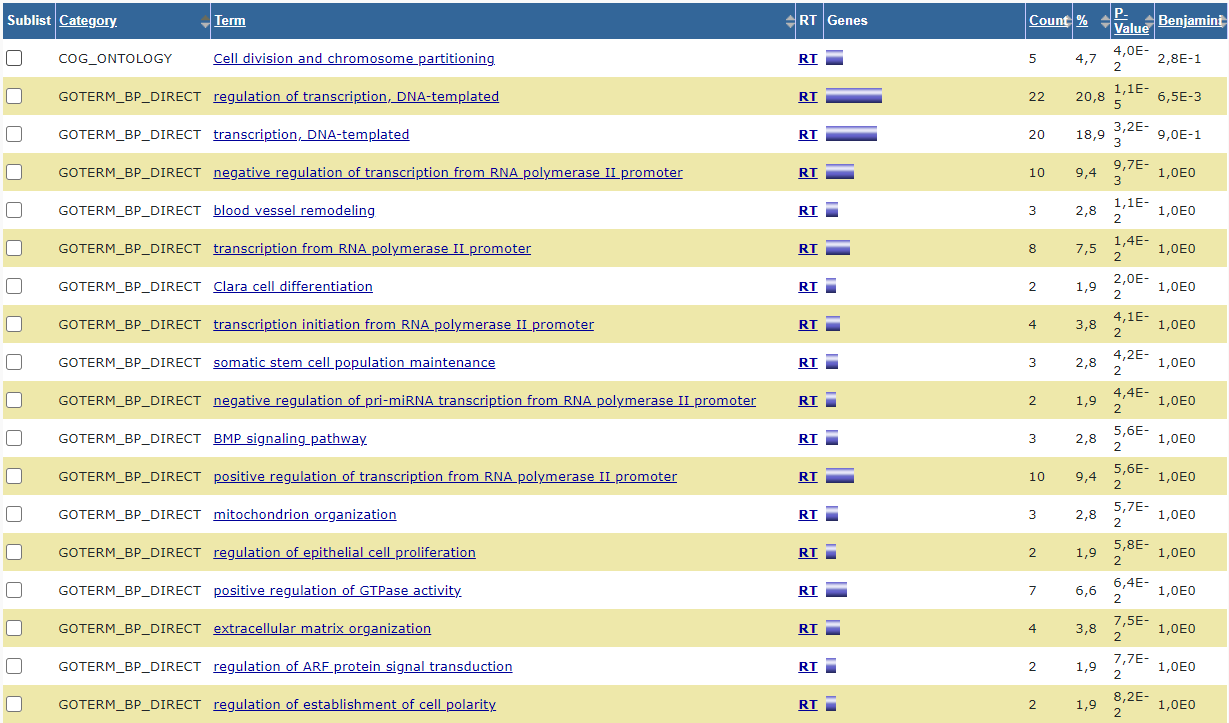

Indeed, these terms already seem to lead in the direction that was proposed by the first hypothesis we made for this analysis, but further exploration is required.

## Profiler
Profiler again uses our list of up-down regulated genes to look for enrichment. It is noticeable here that the knocked down cells present upregulation of genes that are involved in many biological processes related to organ or tissue development. Indeed, from lowest adjusted p-value we see:

- Regulation of striated muscle tissue development
- Regulation of muscle organ development
- Regulation of muscle tissue development
- Cardiac ventricle development
- Ventricular septum development
- Regulation of transcription
- Club cell differentiation
- Tissue development
- Organ growth
- etc...

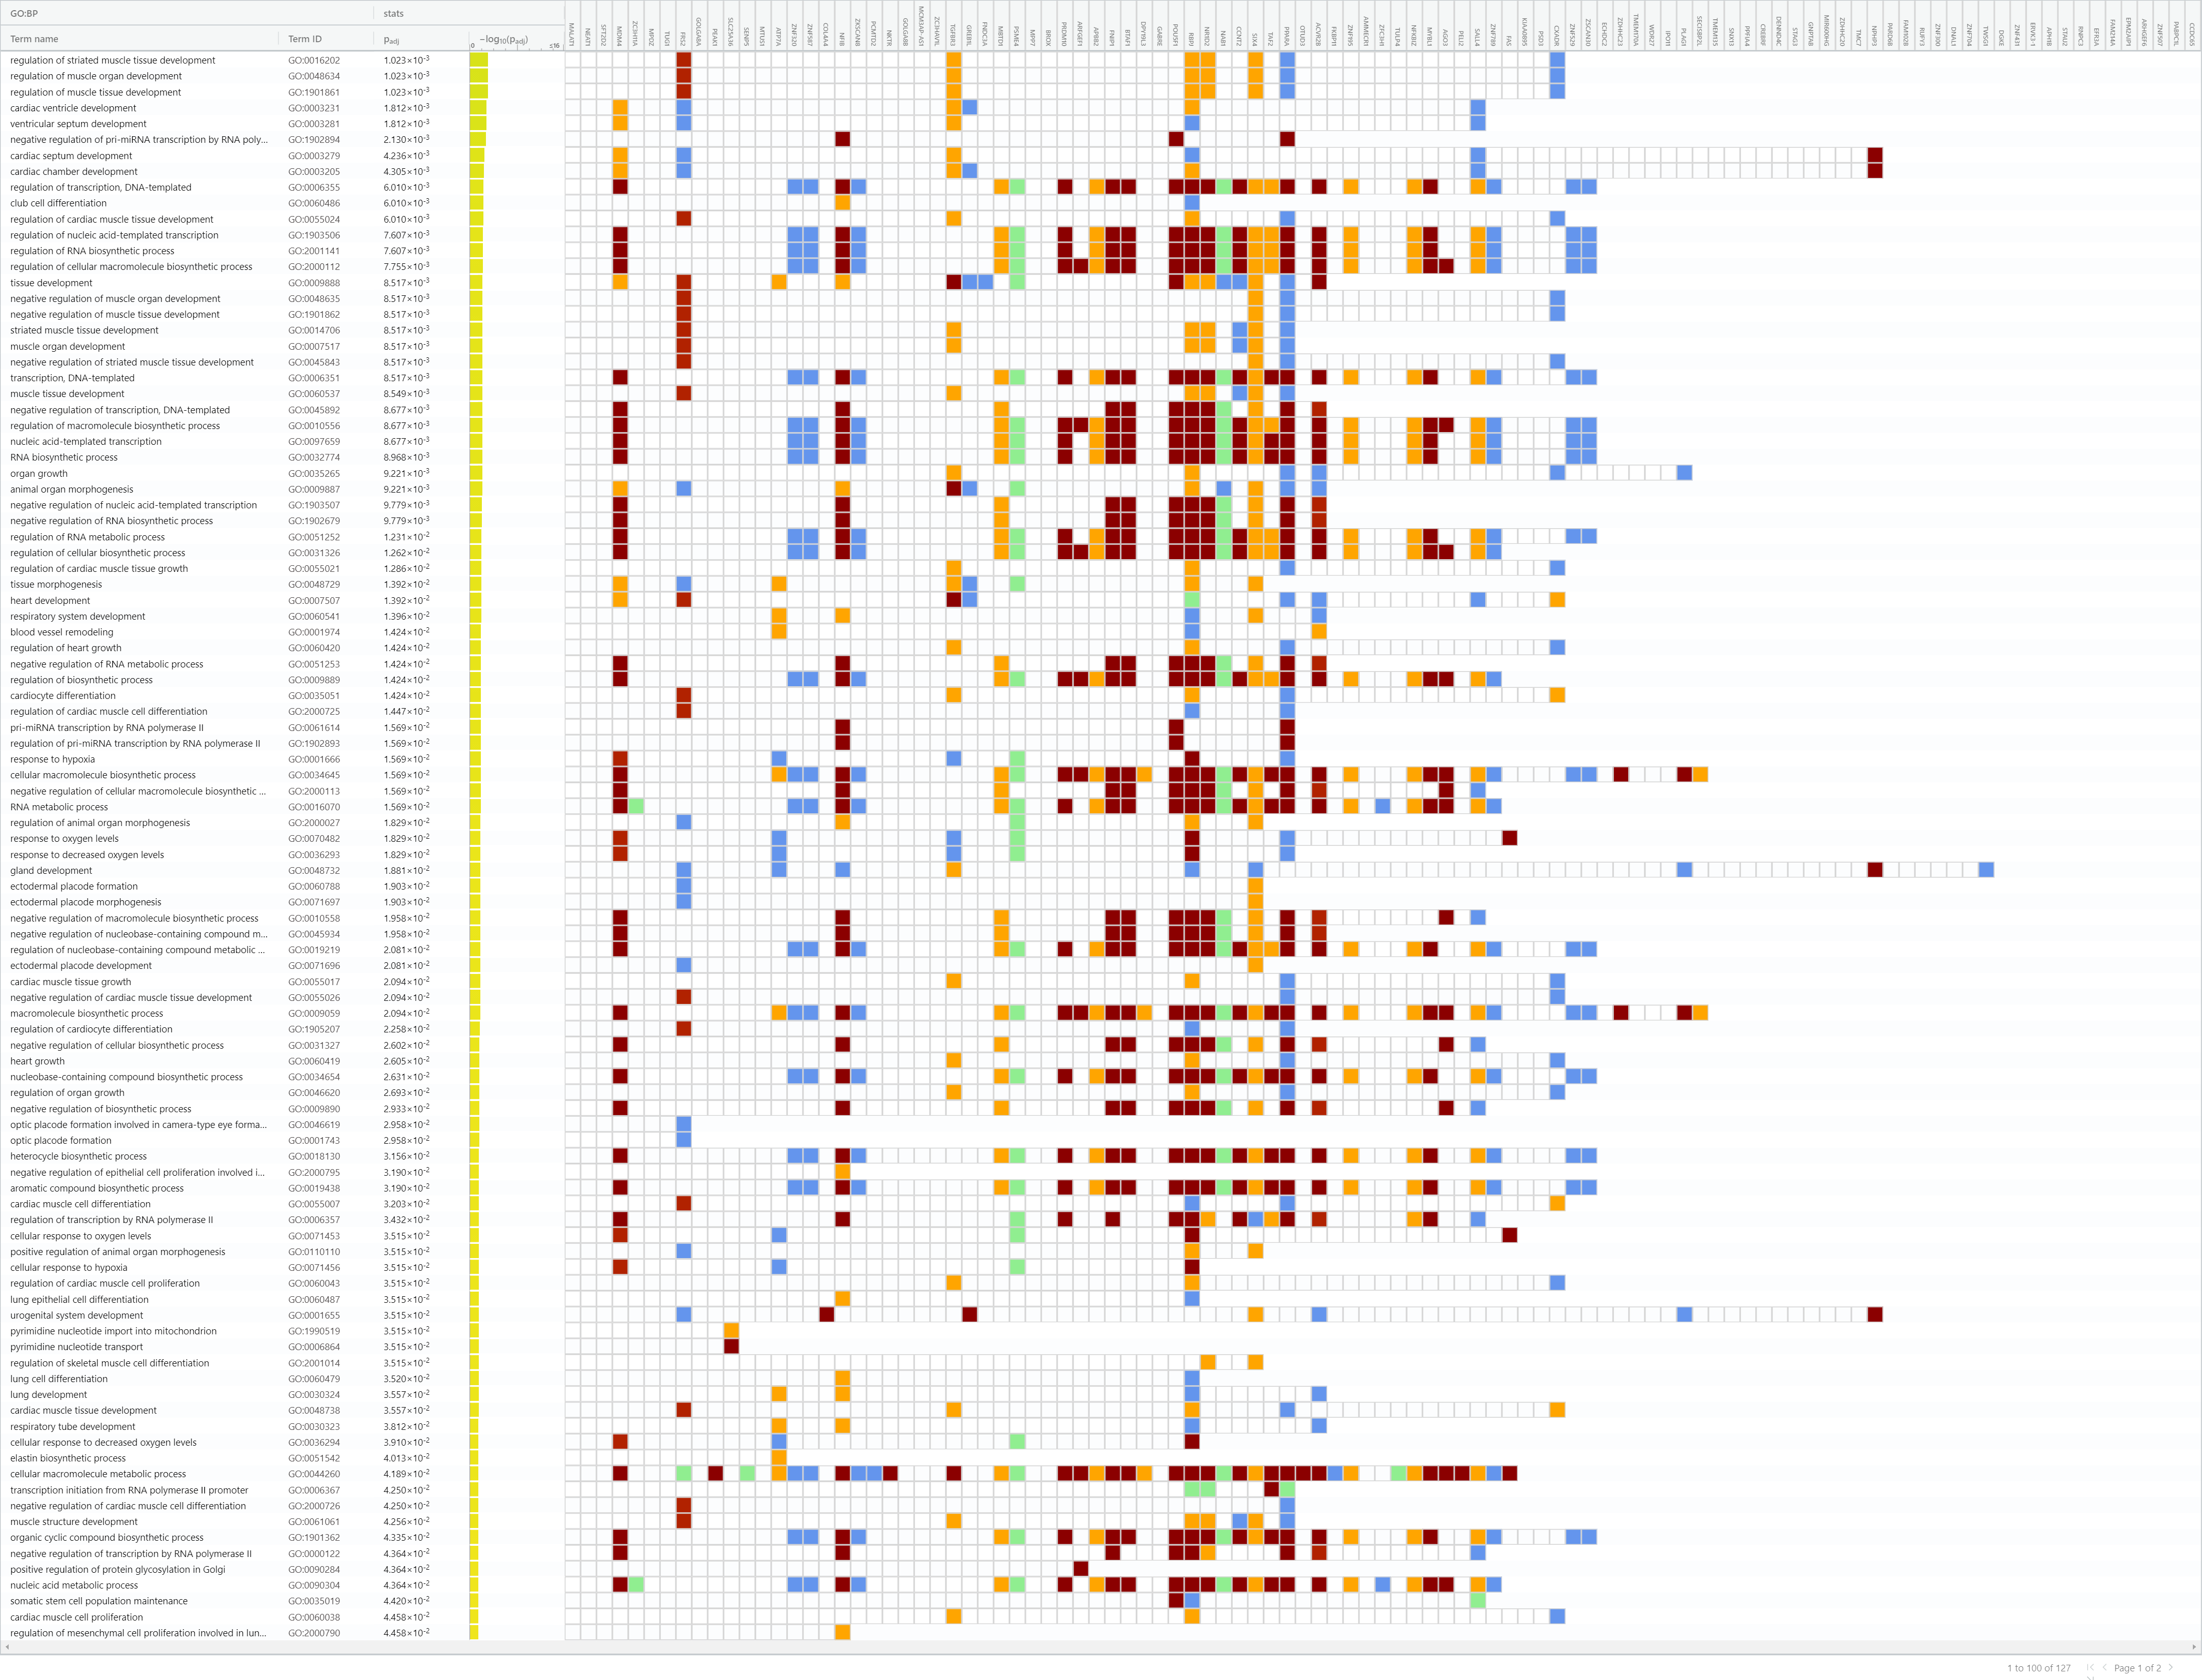


In the image below is an overview of the results obtained from Profiler. On the y-axis is the -log10 of the p-adjusted value for the enriched molecular functions, biological processes and trascription factors that have been found.

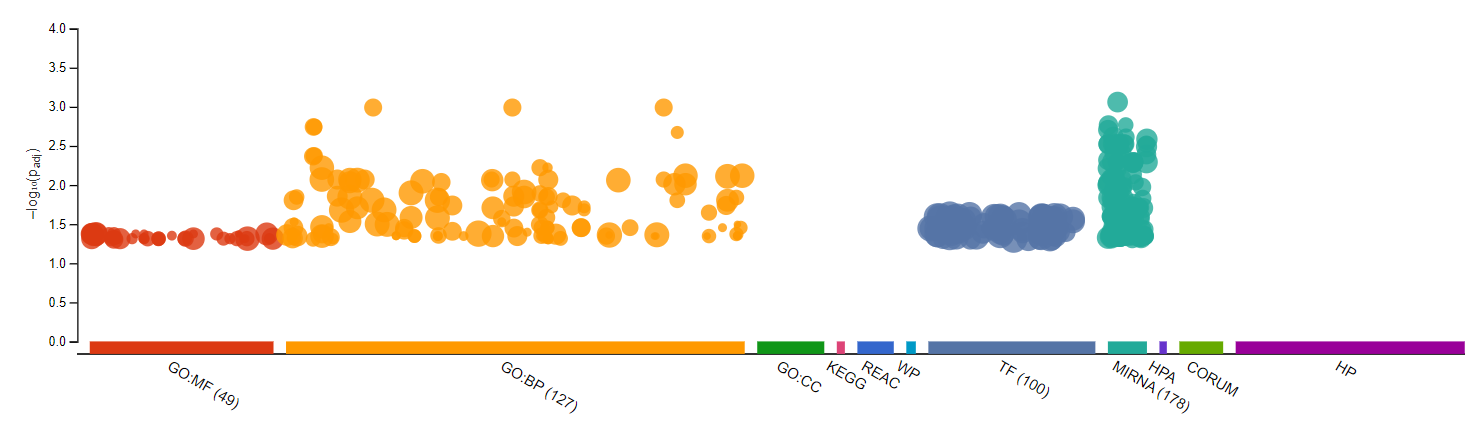

## Ranking-based enrichment analysis
So far we have only explored the upregulated genes by selecting them with arbitrary thresholds; this might be sometimes dangerous since we might lose information that would be excluded from the functional analysis. There is another approach in this sense that tries to avoid that; instead of selecting the genes with arbitrary thresholds we build a ranking, based for instance on the log2change or on the adjusted p-value, and then perform a ranking based enrichment analysis.

We first create files of ascendent and descendent ranking based on the log2change (column 3).

In [23]:
cat deseq.trimmed.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCdesc.txt

In [24]:
cat deseq.trimmed.results.tsv | sort -k3,3g | awk '$3 != "NA" {print $1}' | grep -v Gene > deseq.results.sortFCasc.txt

Previously we had selected only 122 upregulated genes and 19 downregulated genes, while now we using the whole ranking (excluding the zero count genes we have aproximately 21 thousands genes).

### GOrilla
The outputs for the descendent and ascendent ranking respectively are at these links:

http://cbl-gorilla.cs.technion.ac.il/GOrilla/edvuk5fi/GOResults.html

http://cbl-gorilla.cs.technion.ac.il/GOrilla/0c8k7yd5/GOResults.html

A schema looking like this is present for each of the analysis; processes whose GO term is associated with the genes are listed below it.

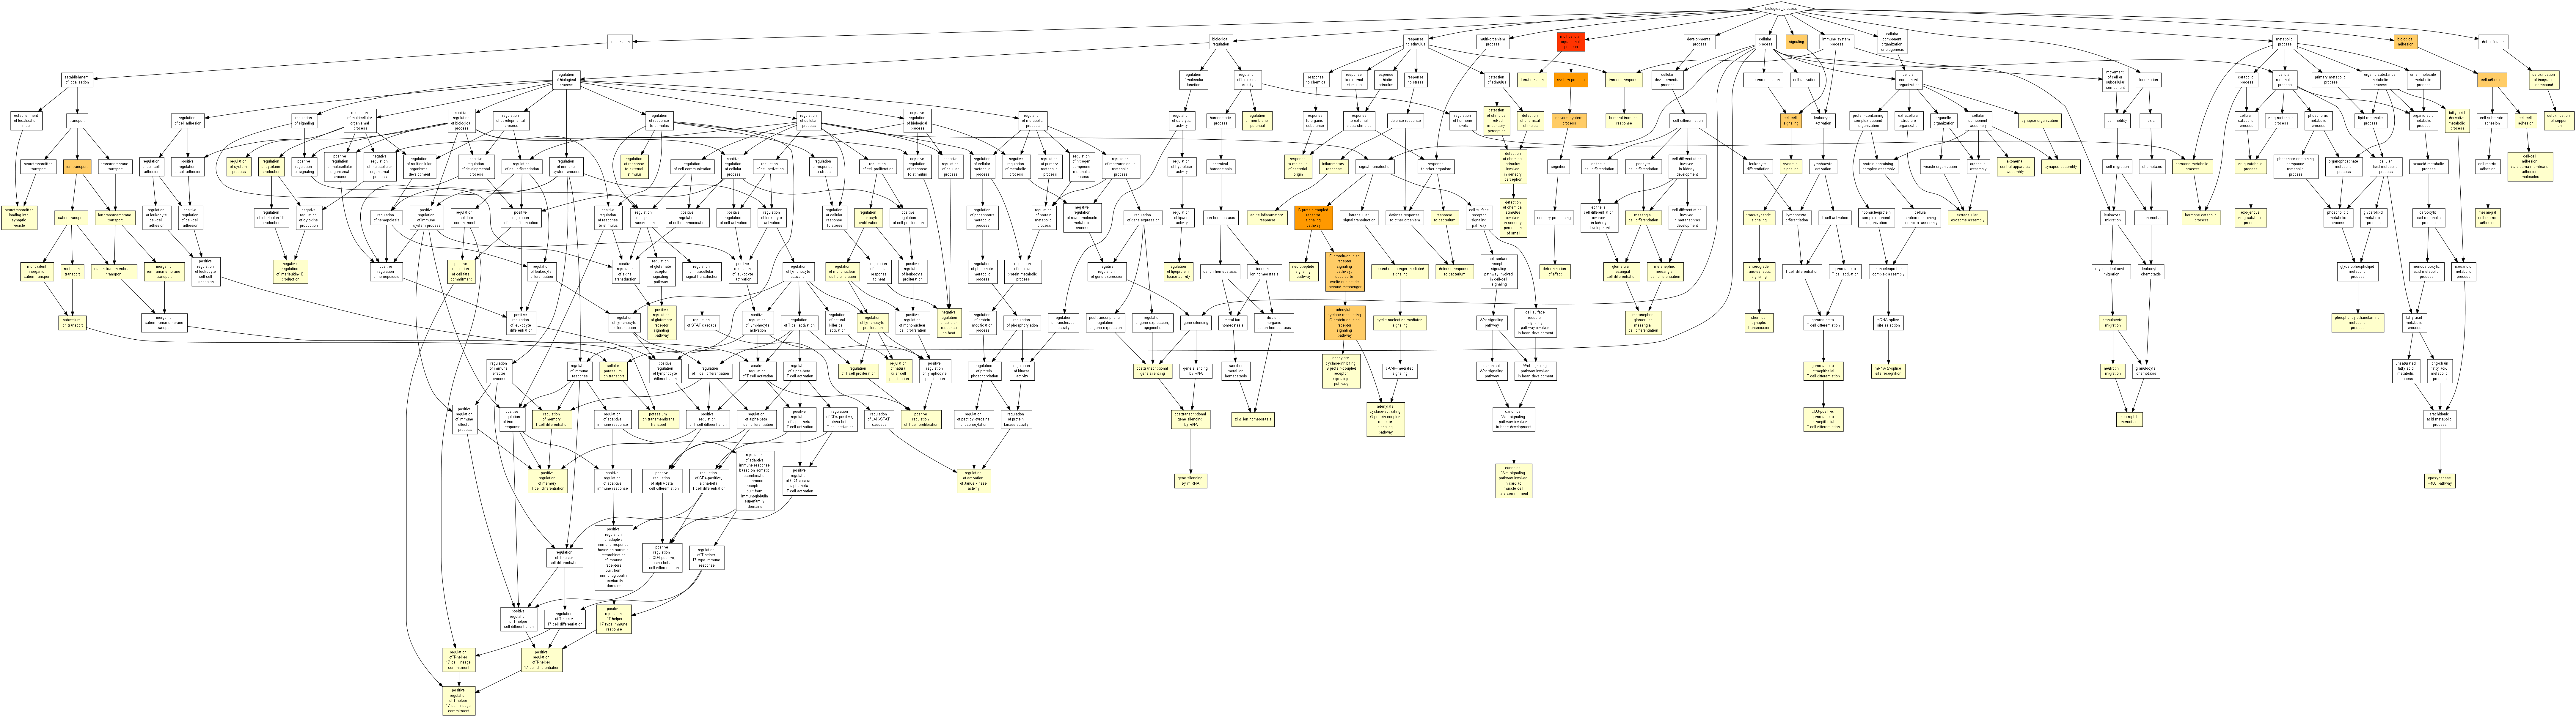

For the descendent ranking, where the genes with the higher log2change are on top, we obtain a series of related processes. Some of these are indeed related to development of new tissue.

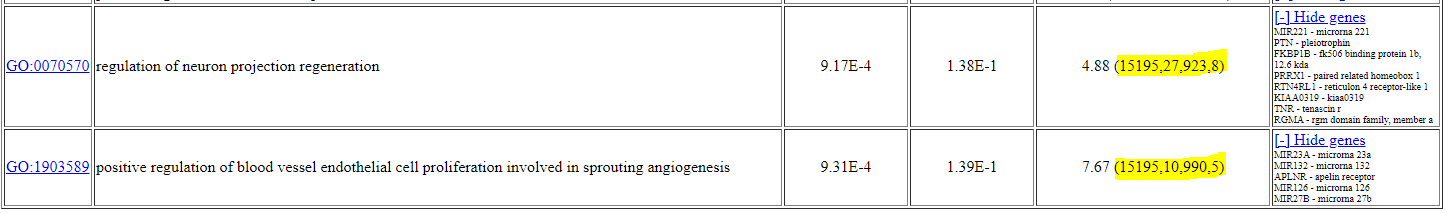

It is even more interesting to consider the results for the downregulated genes, given the fact that for those I have not been able to identify a relevant number using the arbitrary thresholds. It is noticeable right away that many of the identified GO terms of the downreguled genes in the Filamin B knockdown are related to immune or inflammatory response. Notice that an immune response is an obstacle to the development of cancer cells, and the activation of an immune response leads to the packaging and disposal of cancer cell that have been recognised as a problem by the body. 

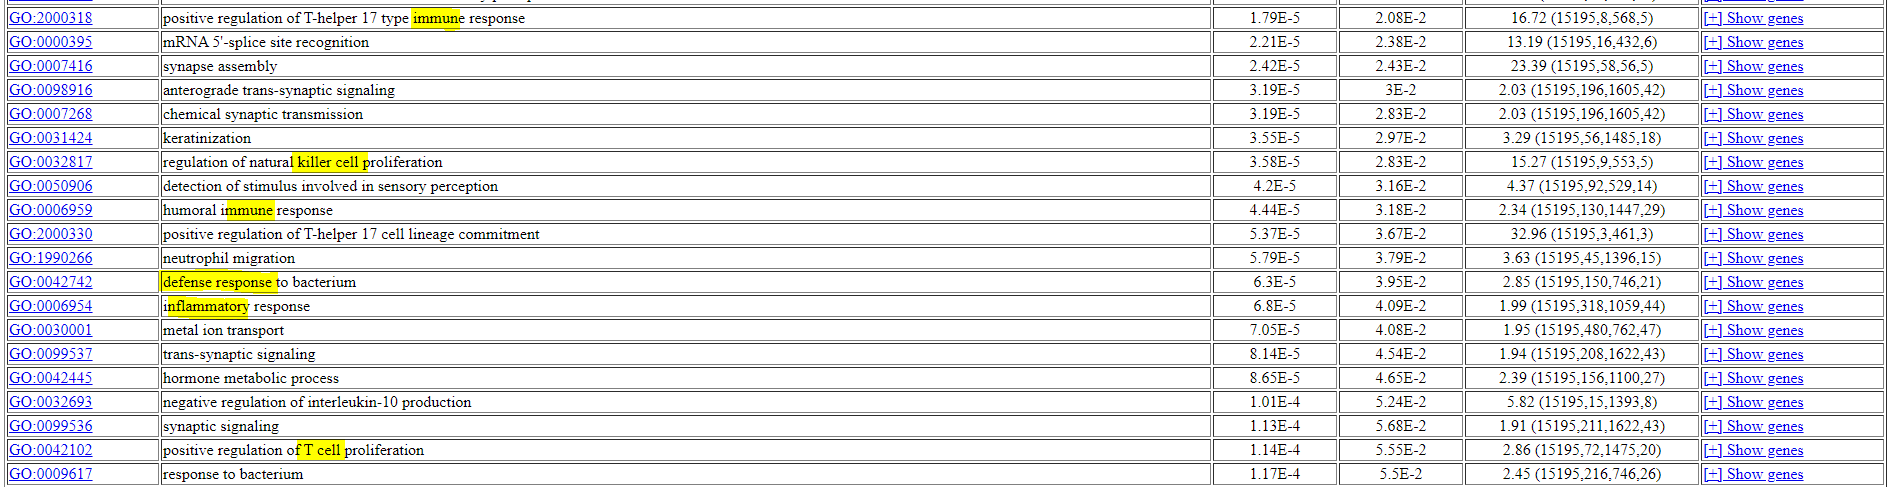

This means that in cancer cells, without the expression of filamin B, the immune response is downregulated. Then, in cancer cells, without the expression of filamin B, the proliferation and angiogenesis is upregulated. This is indeed a very interesting insight, and it surely suggests that the crucial role in cancer development that has been attested in literature might indeed be true. Indeed, in literature, disregulation of Filamin B expression has been before associated with particularly invasive cancer, or those likely to give raise to methastasis or migrate.

Notice how for many of these terms that we have recognised in GOrilla the leading edge, which is the third number from the second last column is much higher than the number of genes that we had selected using only an arbitrary threshold; indeed, using only the small number of those gene is surely still interesting, but still we missed some information, and it was not enough for a dataset such as the one that we are considering.


## GSEA : Gene Set Enrichment Analysis
Another approach for a ranking-based enrichment analysis is GSEA, for which I first need to create a rank file.

In [26]:
cat deseq.trimmed.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | head

RP11-848P1.2 7.90781303628202
SPON1 7.75558196833566
TTC9B 7.73391864443921
CLDN18 7.6502531747127
RP11-53B2.2 7.57378729956506
RP5-956O18.2 7.53662882336461
MMP13 7.52424101592129
RP11-477D19.2 7.50836745580739
DGCR9 7.50379762174739
PLAC8L1 7.42379484963838
grep: write error: Broken pipe
sort: write failed: 'standard output': Broken pipe
sort: write error


In [28]:
cat deseq.trimmed.results.tsv | sort -k 3,3gr | awk '$3 != "NA" {print $1, $3}' | grep -v Gene | tr ' ' '\t' > deseq.logFC.rnk

Running the GSEA on the standalone tool will provide output in a html file:

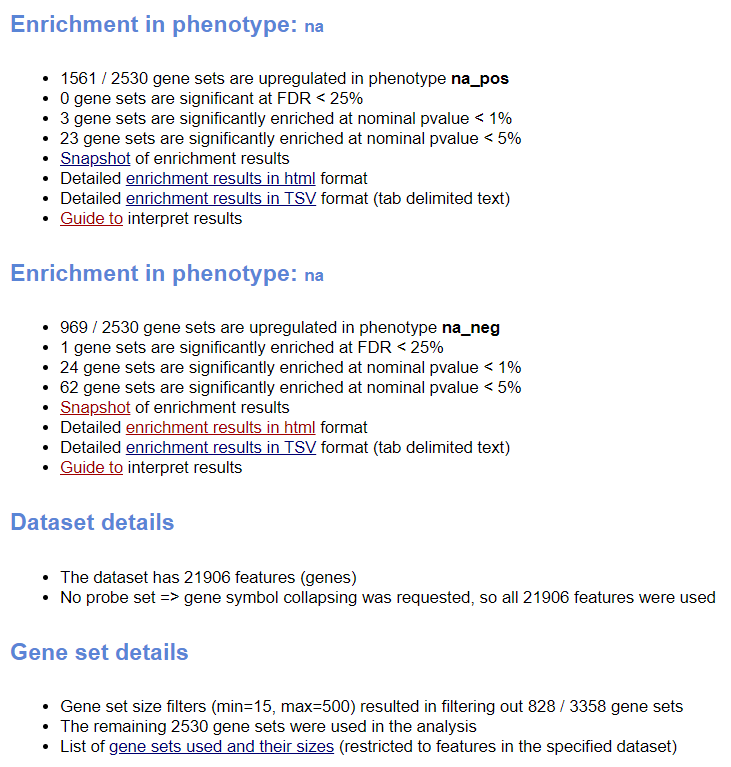

The enrichment provides a list of terms that are enriched with their corresponding leading edge and significance.

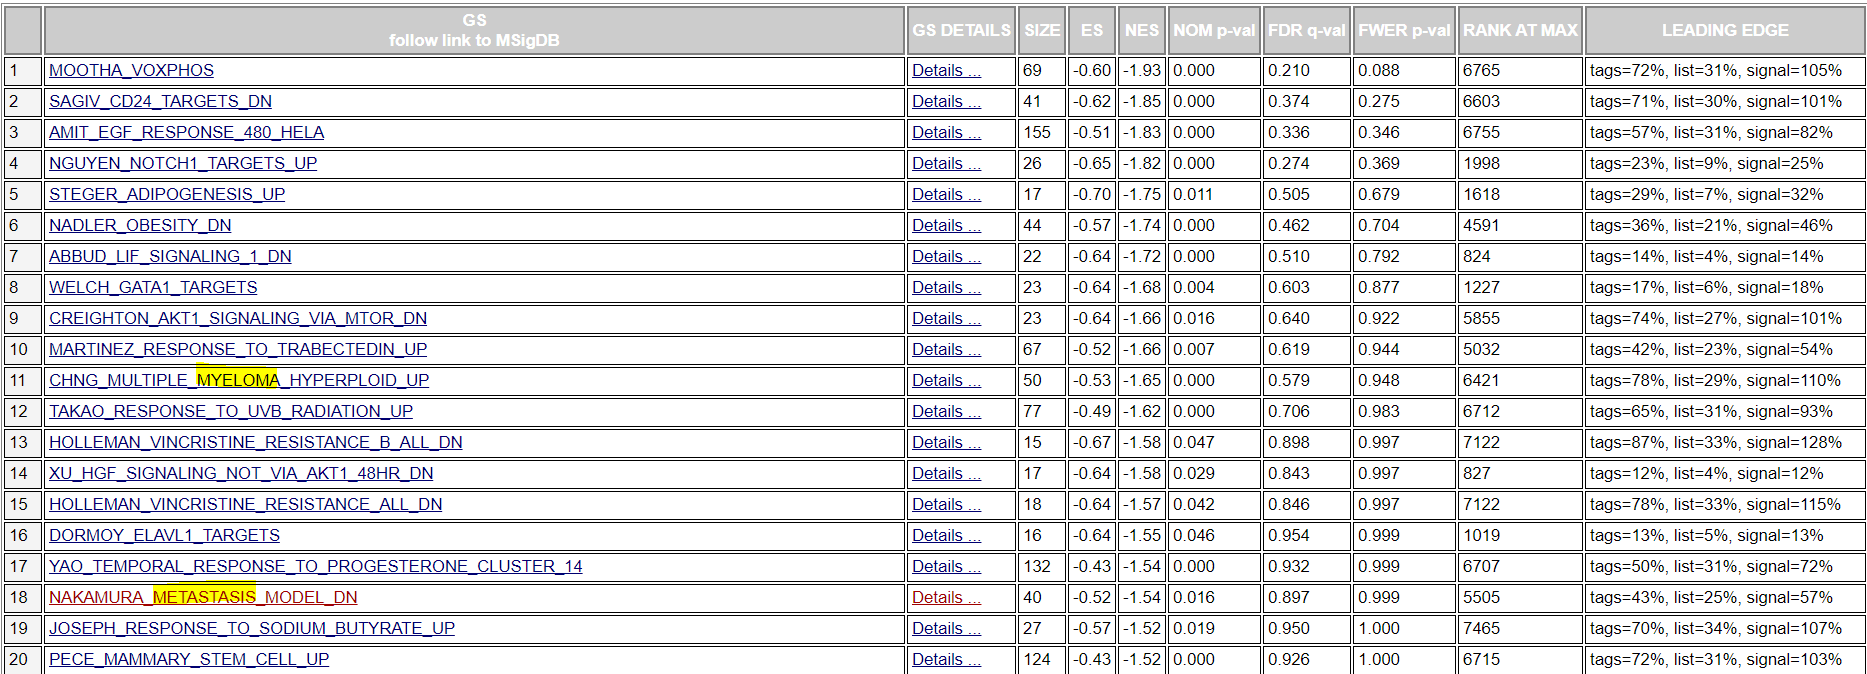

There are indeed enriched terms for cancer development and metastasis, such as:

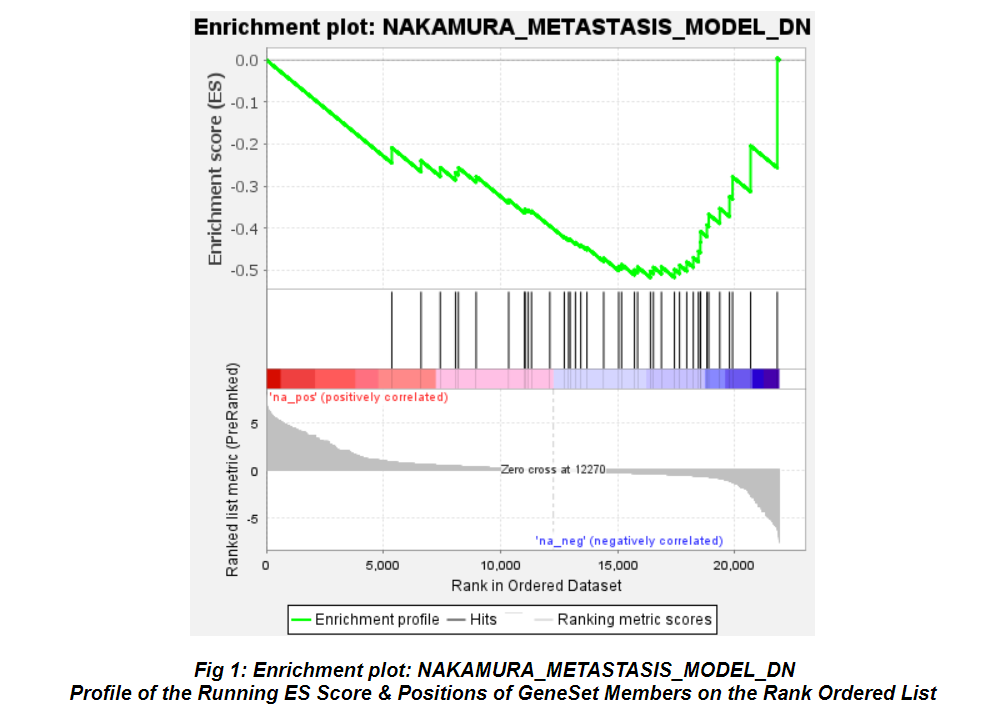

## Cytoscape and iRegulon



I also explored the upregulated genes to look for any connection to a common transcription factor using cytoscape and the application iRegulon.

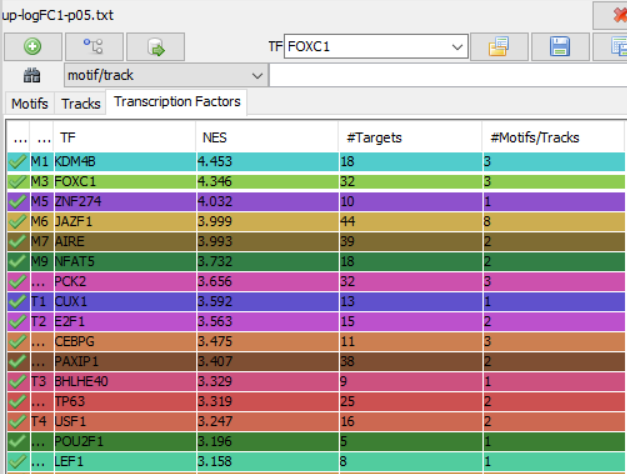

I can see right away that many of the genes in the set of upregulated genes (so those genes whose expression has been modified by the change in expression in Filamin B) are connected to the transcription factor FOXC1. This transcription factor according to previous literature is known to interact with Filamin B itself to form a complex.

Source: Li J, Choi PS, Chaffer CL, Labella K, Hwang JH, Giacomelli AO, Kim JW, Ilic N, Doench JG, Ly SH, Dai C, Hagel K, Hong AL, Gjoerup O, Goel S, Ge JY, Root DE, Zhao JJ, Brooks AN, Weinberg RA, Hahn WC. An alternative splicing switch in FLNB promotes the mesenchymal cell state in human breast cancer. Elife. 2018 Jul 30;7:e37184. doi: 10.7554/eLife.37184. PMID: 30059005; PMCID: PMC6103745.

In a separate view I can focus on FOXC1.

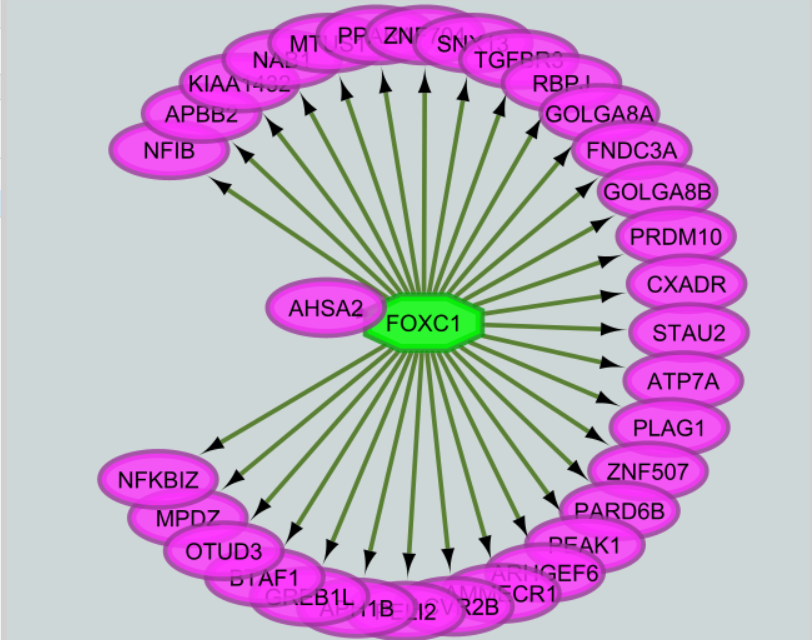

After a functional analysis on the set of differentially expressed genes between the control Hela cells and the Filamin B knock-down cells, it seems clear that there are indeed terms that get constantly correlated in particular to the set of upregulated genes and that this is not coincidental. For the upregulated genes probably Profiler provided the most terms correlated to cellular/tissue development, while GOrilla allowed us to correlate the down-regulated genes to inflammatory and immune responses. 

All these elements suggest that indeed Filamin B might be indeed playing an important role in cancer cells, as seen in the RNA sequence analysis that we have carried out and considering the previous literature on the subject.